<a href="https://colab.research.google.com/github/ML-Bioinfo-CEITEC/ECCB2021/blob/main/notebooks/Practice_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get data into the correct format

## create TF dataset

In [ ]:
#imports
#DATA DOWNLOAD
#TODO load data from folders
#DATA LOAD hint: https://colab.research.google.com/github/ML-Bioinfo-CEITEC/ECCB2021/blob/main/notebooks/04_Transfer_Learning.ipynb
#DATA PREPROCESS

In [1]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
from pathlib import Path

_URL = 'https://github.com/ML-Bioinfo-CEITEC/ECCB2021/raw/main/data/intergenic_vs_coding_20000_seqs.zip'
PATH = Path('/content/datasets/dna_dataset')
with urlopen(_URL) as zipresp:
  with ZipFile(BytesIO(zipresp.read())) as zfile:
      zfile.extractall(PATH)

In [111]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

train_dset = tf.keras.preprocessing.text_dataset_from_directory(PATH/'intergenic_vs_coding_10000_seqs'/'train')
valid_dset = tf.keras.preprocessing.text_dataset_from_directory(PATH/'intergenic_vs_coding_10000_seqs'/'valid')


Found 18335 files belonging to 2 classes.
Found 1665 files belonging to 2 classes.


In [73]:
for x,y in dset.take(1):
  print(x)
  print(y)

tf.Tensor(
[b'TGGGCTTTTAAAAAGTGACAGCTGCTCTTCAGAGTGATAGACAGGTGTCCACATTTCAGCTTTCTTTGTTTGTCACTGTGTGTGTTTGTTCTTACCAGTAATGCCTGGGAAGGGCGGCAAACACTGTTGTGCTTGGATACGAAAACCAAGGCCTGATTAGCGTAAGCGTTTGTTGAAAAAGCATTTTCTCTGCACACTAA'
 b'GCTGATGCCCCCATGTTCGTCATGGGTGTGAACCATGAGAAGTATGACAACAGCCTCAAGATCATCAGCAATGCCTCCTGCACCACCAACTGCTTAGCACCCCTGGCCAAGGTCATCCATGACAACTTTGGTATCGTGGAAGGACTCATGACCACAGTCCATGCCATCACTGCCACCCAGAAGACTGTGGATGGCCCCTC'
 b'ACCGACACACAGTGCAAGCGCGTAGGAACACAATGCTGGGTGTTTGGGGTCATTGGTTTCCTGGAGGCCATTGTTTGCATAAAATTTGGACAAGATCTCTTCTCTAAGACCCAAATACTCTATGTTGTGCTTTGGCTTCTTTGCGTGGCTTTCACCACTTTCCTCTGTCTGTACGGCATGATTTGGTATGCAGAACACTA'
 b'TTAAGATTGGGCAGCCCAAGAAACAGATTGTGCCCAAAACAGTGGAGAGAGACTTTGAAAGGGAGTATGGAAAACTTCAGCAGCTGGAAGAGCAGACCCGGAGGCTGCAGAAAGACATGAAGAAGAGCACCGACGCAGACCTGGCCATGTCAAAATCTGCCGTGAAGATATCCTTGGACTTACTCTCCAATCCCCTCTGT'
 b'CGCTGGACCAACCCCCAGTACCGGCAGTTCATCACCATCTTGGAAGCAACACATCGGAACCAGTCTTCAGAAAACAAGAGGCAGCTTGCCAACTACAACTTTGACTTCCGGAGCTGGCCAGTCGACTTCCACTGGGAAGAACCCAGCAGCCGGAAGGAGTCTCGAG

## preprocessing

In [112]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

def splitter(input):
  return tf.strings.substr(input, 0, 1)

vectorize_layer = TextVectorization(output_mode='int', split=splitter, ngrams=3)
vectorize_layer.adapt(train_text)
print(len(vectorize_layer.get_vocabulary()))
print(vectorize_layer.get_vocabulary())



86
['', '[UNK]', 'a', 't', 'g', 'c', 'a a', 't a', 'a t', 't t', 'g a', 'a g', 'a c', 'c t', 'c a', 't c', 'g t', 't g', 'g g', 'c g', 'g c', 'c c', 'a a a', 't a a', 'a a t', 't t a', 'a t a', 'a t t', 't a t', 't t t', 'a a g', 'a a c', 'g a a', 'a g t', 'a c a', 'g g a', 'g t a', 'c a a', 't c t', 't a g', 'a t g', 'a c t', 'c t t', 't a c', 'g a t', 't g t', 'c t a', 'a t c', 't g a', 'g c a', 'a g c', 'c a t', 'a g a', 'g a g', 'a c g', 'a g g', 't t c', 'c g a', 't t g', 't c a', 'c a c', 'c g g', 'c c t', 't c g', 'g g g', 'c t c', 'c a g', 'a c c', 'g a c', 'g t t', 'c t g', 'g t c', 't g c', 'g c t', 't g g', 'g c g', 't c c', 'g t g', 'g g t', 'c g c', 'c c a', 'c c c', 'g c c', 'g g c', 'c g t', 'c c g']


In [108]:
# def vectorize_text(text, label):
#   text = tf.expand_dims(text, -1)
#   return vectorize_layer(text)-2, label
#   return vectorize_layer(text), label

# dset2 = dset.map(vectorize_text)

# for x,y in dset2.take(1):
#   print(x)
#   print(y)

model = tf.keras.Sequential([vectorize_layer])
model.predict(dset)


array([ 3,  4,  3, ..., 79, 83, 63])

# Define neural network model

In [113]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Lambda(lambda x: tf.one_hot(tf.cast(x,'int64'), 86)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#possible improvements
# Adjust layers, number of neurons, correct activation function
#LSTM layer - change parameters
# add augmentations layer, embedding layer, split into different tokens (not only letters), dropout


# Train the model

In [114]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(train_dset, epochs=10, validation_data=valid_dset)

#possible improvements
# change number of epochs, learning rate (if training is unstable), increase data amount

Epoch 1/10


ValueError: ignored

# Evaluate

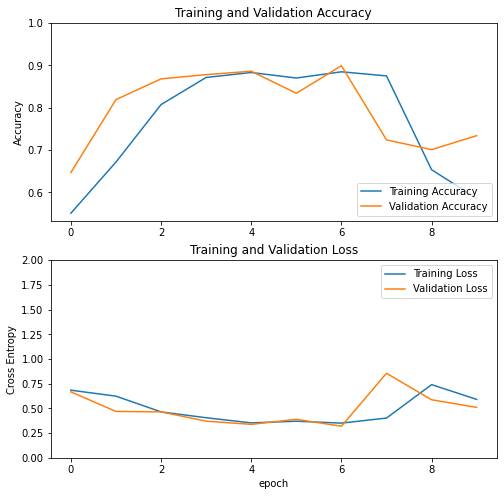

In [11]:
def plot_metrics(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),1])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([0,2.0])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

plot_metrics(history)